In [1]:
import os, shutil
original_dataset_dir = r'D:\Code_practice\project\dog_cat\train\train'
base_dir = r'D:/Code_practice/project/dog_cat/data'
if not os.path.isdir(base_dir): os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
if not os.path.isdir(train_dir): os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.isdir(validation_dir): os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
if not os.path.isdir(test_dir): os.mkdir(test_dir)
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.isdir(train_cats_dir): os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.isdir(train_dogs_dir): os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.isdir(validation_cats_dir): os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.isdir(validation_dogs_dir): os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.isdir(test_cats_dir): os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.isdir(test_dogs_dir): os.mkdir(test_dogs_dir)

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [5]:
print(train_cats_dir)
os.path.isdir(train_cats_dir)

D:/Code_practice/project/dog_cat/data\train\cats


True

In [6]:
print('train cat pics:', len(os.listdir(train_cats_dir)))
print('val cat pics:', len(os.listdir(validation_cats_dir)))
print('test cat pics:', len(os.listdir(test_cats_dir)))
print('train dog pics:', len(os.listdir(train_dogs_dir)))
print('val dog pics:', len(os.listdir(validation_dogs_dir)))
print('test dog pics:', len(os.listdir(test_dogs_dir)))

train cat pics: 1000
val cat pics: 500
test cat pics: 500
train dog pics: 1000
val dog pics: 500
test dog pics: 500


In [2]:
from keras import layers, models
from tensorflow.keras import optimizers
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
strategy = tf.distribute.MirroredStrategy()
##https://keras.io/guides/distributed_training/

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


In [41]:
keras.optimizers

<module 'keras.optimizers' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\keras\\optimizers.py'>

In [3]:
with strategy.scope():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))   ###已被調整大小的影像
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))   
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))   
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))   
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(learning_rate=1e-4),
                # optimizer="rmsprop",
                metrics=['acc'])


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size=(150, 150),
                  batch_size=20,
                  class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
                  validation_dir,
                  target_size=(150, 150),
                  batch_size=20,
                  class_mode='binary')                  

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
history = model.fit(
            train_generator,      ##generator
            steps_per_epoch=100,  ##抽取批次量設定
            epochs=30,
            # epochs=5,   ### for testing params
            validation_data=validation_generator,
            validation_steps=50   ##抽取批次量設定
  )

C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
100/100 [==============================] - 42s 323ms/step - loss: 0.6974 - acc: 0.4953 - val_loss: 0.6794 - val_acc: 0.5920
Epoch 2/5
100/100 [==============================] - 24s 237ms/step - loss: 0.6728 - acc: 0.5701 - val_loss: 0.6564 - val_acc: 0.5920
Epoch 3/5
100/100 [==============================] - 24s 235ms/step - loss: 0.6258 - acc: 0.6529 - val_loss: 0.6202 - val_acc: 0.6470
Epoch 4/5
100/100 [==============================] - 24s 237ms/step - loss: 0.5761 - acc: 0.6924 - val_loss: 0.6156 - val_acc: 0.6520
Epoch 5/5
100/100 [==============================] - 23s 232ms/step - loss: 0.5503 - acc: 0.7225 - val_loss: 0.5909 - val_acc: 0.6650


In [16]:
path = 'D:/Code_practice/project/dog_cat/'
model.save(f'{path}cats_&dog_small_1.h5')

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoch = range(1, len(acc) + 1)

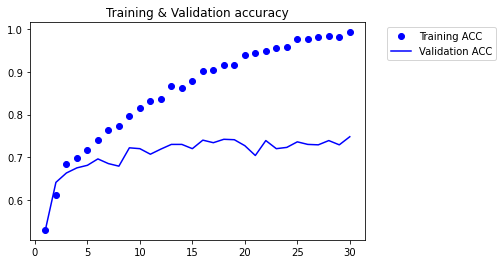

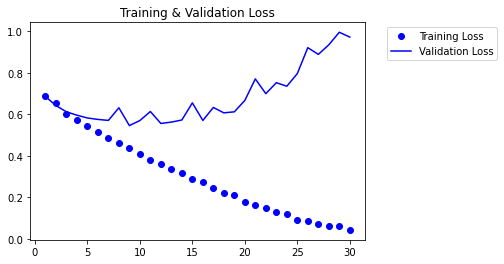

In [11]:
plt.plot(epoch, acc, 'bo', label="Training ACC")
plt.plot(epoch, val_acc, 'b', label="Validation ACC")
plt.title("Training & Validation accuracy")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.figure()
plt.plot(epoch, loss, 'bo', label="Training Loss")
plt.plot(epoch, val_loss, 'b', label="Validation Loss")
plt.title("Training & Validation Loss")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [23]:
#### 資料擴增  Data Augmentation
###將train 資料進行擴增

# train_datagen = ImageDataGenerator(rescale=1./255)
aug_datagen = ImageDataGenerator(rescale=1./255,
                                rotation_range=40,       ##旋轉角度
                                width_shift_range=0.2,    ##水平平移
                                height_shift_range=0.2,   ##垂直平移
                                shear_range=0.2,          ##傾斜
                                zoom_range=0.2,           ##縮放
                                horizontal_flip=True,     ##水平翻轉一半影像
                                fill_mode='nearest')      ##新建影像在旋轉或偏移影像出現空白時，進行影像像素填補
'''validation data不應擴充'''
test_datagen = ImageDataGenerator(rescale=1./255)  

train_generator = aug_datagen.flow_from_directory(
                  train_dir,
                  target_size=(150, 150),
                  batch_size=32,
                  class_mode='binary')
'''validation data不應擴充'''                  
validation_generator = test_datagen.flow_from_directory(
                  validation_dir,
                  target_size=(150, 150),
                  batch_size=32,
                  class_mode='binary')                  

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


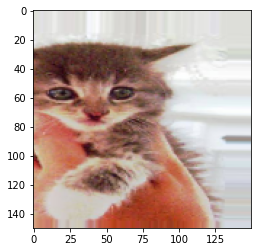

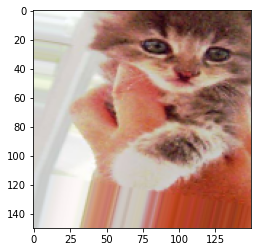

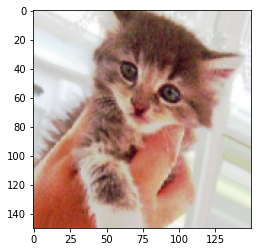

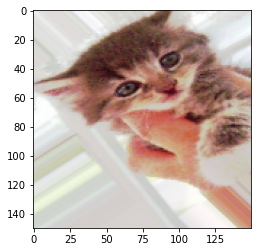

In [24]:
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]   ## choose one image
img = image.load_img(img_path, target_size=(150, 150))  ##讀取並調整影像
x = image.img_to_array(img)      ##轉換成shape=(150, 150, 3)的Numpy矩陣
x = x.reshape((1, ) + x.shape)   ##調整shape=(1, 150, 150, 3)
# print(x.shape)
# print(len(fnames))
i = 0
for batch in aug_datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break

plt.show()

In [28]:
with strategy.scope():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))   ###已被調整大小的影像
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))   
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))   
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))   
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(learning_rate=1e-4),
                metrics=['acc'])
  #### 資料擴增  Data Augmentation
  ###將train 資料進行擴增

  # train_datagen = ImageDataGenerator(rescale=1./255)
  aug_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,       ##旋轉角度
                                  width_shift_range=0.2,    ##水平平移
                                  height_shift_range=0.2,   ##垂直平移
                                  shear_range=0.2,          ##傾斜
                                  zoom_range=0.2,           ##縮放
                                  horizontal_flip=True,     ##水平翻轉一半影像
                                  fill_mode='nearest')      ##新建影像在旋轉或偏移影像出現空白時，進行影像像素填補
  '''validation data不應擴充'''
  test_datagen = ImageDataGenerator(rescale=1./255)  

  train_generator = aug_datagen.flow_from_directory(
                    train_dir,
                    target_size=(150, 150),
                    batch_size=32,
                    class_mode='binary')
  '''validation data不應擴充'''                  
  validation_generator = test_datagen.flow_from_directory(
                    validation_dir,
                    target_size=(150, 150),
                    batch_size=32,
                    class_mode='binary')    
  history = model.fit(
              train_generator,      ##generator
              steps_per_epoch=63,  ##抽取批次量設定
              epochs=100,
              validation_data=validation_generator#,
              # validation_steps=50   ##抽取批次量設定，如果不設定會全部val樣本都跑完
    )
# model.inputs

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
63/63 [==============================] - 13s 206ms/step - loss: 0.6933 - acc: 0.5125 - val_loss: 0.6850 - val_acc: 0.5510
Epoch 2/100
63/63 [==============================] - 12s 190ms/step - loss: 0.6858 - acc: 0.5420 - val_loss: 0.6712 - val_acc: 0.5740
Epoch 3/100
63/63 [==============================] - 12s 185ms/step - loss: 0.6735 - acc: 0.5885 - val_loss: 0.6764 - val_acc: 0.5370
Epoch 4/100
63/63 [==============================] - 11s 182ms/step - loss: 0.6582 - acc: 0.6145 - val_loss: 0.6744 - val_acc: 0.5650
Epoch 5/100
63/63 [==============================] - 11s 181ms/step - loss: 0.6419 - acc: 0.6255 - val_loss: 0.6234 - val_acc: 0.6530
Epoch 6/100
63/63 [==============================] - 11s 183ms/step - loss: 0.6341 - acc: 0.6255 - val_loss: 0.6181 - val_acc: 0.6550
Epoch 7/100
63/63 [==============================] - 12s 184ms/step - loss: 0.6312 - acc: 0.6475 - val_loss: 0.5

In [29]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 128)      

In [30]:
path = 'D:/Code_practice/project/dog_cat/'
model.save('cats_and_dogs_small_2.h5')

In [45]:
## How to setting

batch_size = 32
steps_per_epoch = len(train_generator)//batch_size
validation_steps = len(validation_generator)//batch_size # if you have test data
print(steps_per_epoch)
print(validation_steps)

1
1


In [48]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
print(len(acc))
print(len(val_acc))
1000//32

20
20


31

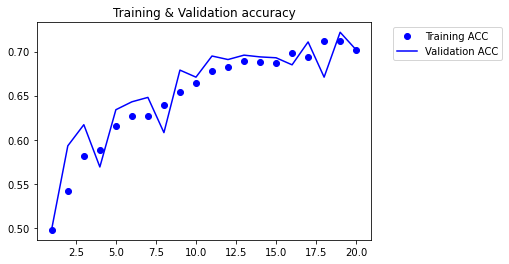

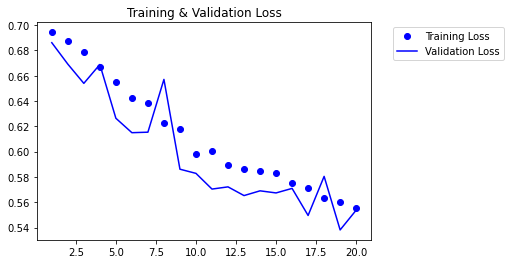

In [47]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoch = range(1, len(acc) + 1)

plt.plot(epoch, acc, 'bo', label="Training ACC")
plt.plot(epoch, val_acc, 'b', label="Validation ACC")
plt.title("Training & Validation accuracy")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.figure()
plt.plot(epoch, loss, 'bo', label="Training Loss")
plt.plot(epoch, val_loss, 'b', label="Validation Loss")
plt.title("Training & Validation Loss")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  #  在這裡加入 Dropout 層 (丟棄 50 %)
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])
#### 資料擴增  Data Augmentation
###將train 資料進行擴增

# train_datagen = ImageDataGenerator(rescale=1./255)
aug_datagen = ImageDataGenerator(
                                rescale=1./255,
                                rotation_range=40,       ##旋轉角度
                                width_shift_range=0.5,    ##水平平移
                                height_shift_range=0.2,   ##垂直平移
                                shear_range=0.2,          ##傾斜
                                zoom_range=0.2,           ##縮放
                                horizontal_flip=True,     ##水平翻轉一半影像
                                fill_mode='nearest')      ##新建影像在旋轉或偏移影像出現空白時，進行影像像素填補
'''validation data不應擴充'''
test_datagen = ImageDataGenerator(rescale=1./255)  

train_generator = aug_datagen.flow_from_directory(
                  train_dir,
                  target_size=(150, 150),
                  batch_size=32,                 
                  class_mode='binary')
'''validation data不應擴充'''                  
validation_generator = test_datagen.flow_from_directory(
                  validation_dir,
                  target_size=(150, 150),
                  batch_size=32,                
                  class_mode='binary')   

# 訓練
history = model.fit(
            train_generator,      ##generator
            steps_per_epoch=63,  ##抽取批次量設定          
            epochs=80,
            validation_data=validation_generator#,
            # validation_steps=50   ##抽取批次量設定，如果不設定會全部val樣本都跑完
  )


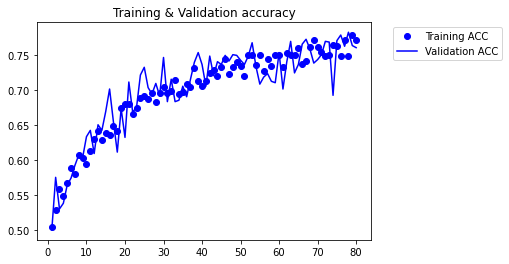

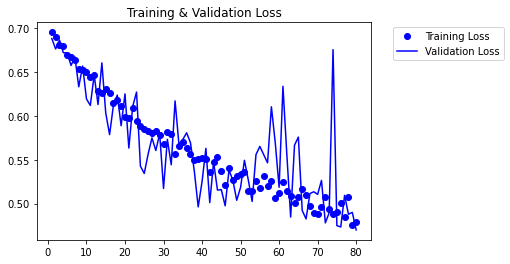

In [51]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoch = range(1, len(acc) + 1)

plt.plot(epoch, acc, 'bo', label="Training ACC")
plt.plot(epoch, val_acc, 'b', label="Validation ACC")
plt.title("Training & Validation accuracy")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.figure()
plt.plot(epoch, loss, 'bo', label="Training Loss")
plt.plot(epoch, val_loss, 'b', label="Validation Loss")
plt.title("Training & Validation Loss")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [53]:
path = 'D:/Code_practice/project/dog_cat/'
model.save(f"{path}/cats_and_dogs_2")

INFO:tensorflow:Assets written to: D:/Code_practice/project/dog_cat//cats_and_dogs_2\assets


In [9]:
#### By Using VGG16S from ImageNet to train cats and dogs model
### Feature extraction
import keras.applications
from keras.applications.vgg16 import VGG16

In [12]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,   ###使用自己的密集分類器，不使用ImageNet的
                  input_shape=(150, 150, 3))   ###可指定NN的影像張量shape，如果不指定則可以處理任何shape

In [13]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [71]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = r'D:/Code_practice/project/dog_cat/data' 
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))              ### x_train
  labels = np.zeros(shape=(sample_count))                           ### y_train
  generator = datagen.flow_from_directory(directory,
                                          target_size=(150, 150),
                                          batch_size=batch_size,
                                          class_mode='binary')
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    print(i, end=' ') # 由於萃取需要較長的時間，我們印出 i 來檢視進度
    if i * batch_size >= sample_count:
      break
  return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)


Found 2000 images belonging to 2 classes.
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 Found 1000 images belonging to 2 classes.
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 Found 1000 images belonging to 2 classes.
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

In [76]:
print(train_features.shape)
print(validation_features.shape)
print(test_features.shape)


(2000, 4, 4, 512)
(1000, 4, 4, 512)
(1000, 4, 4, 512)


In [78]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [ ]:
from keras import models, layers
from keras import optimizers

In [ ]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

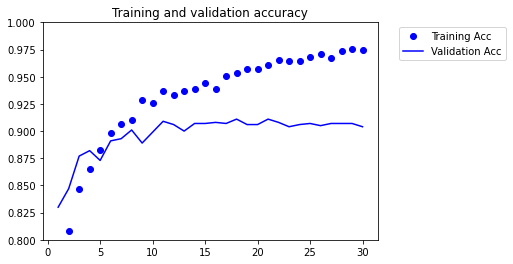

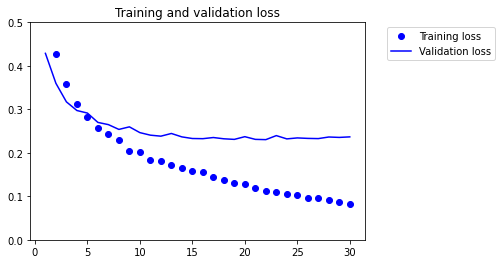

In [87]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label="Training Acc")
plt.plot(epochs, val_acc, 'b', label="Validation Acc")
plt.title("Training and validation accuracy")
plt.ylim([0.8, 1])
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.figure()
plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Training and validation loss")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylim([0, 0.5])
plt.show()

In [52]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

In [95]:
with strategy.scope():
  
  conv_base = VGG16(weights='imagenet',
                    include_top=False,
                    input_shape=(150, 150, 3))

  model = models.Sequential()
  model.add(conv_base)
  model.add(layers.Flatten())
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))

  '''禁止在conv_base時修正weights'''
  print('This is the number of trainable weights'
        'before freezing the conv base:', len(model.trainable_weights))
  conv_base.trainable = False  #####凍結權重
  print('This is the number of trainable weights'
        'after freezing the conv base:', len(model.trainable_weights))

  train_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest'
  )
  test_datagne = ImageDataGenerator(rescale=1./255)

  train_generator = train_datagen.flow_from_directory(
                      train_dir,
                      target_size=(150, 150),
                      batch_size=20,
                      class_mode='binary'
  )

  validation_generator = test_datagen.flow_from_directory(
                          validation_dir,
                          target_size=(150,150),
                          batch_size=20,
                          class_mode='binary'
  )
  model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(learning_rate=2e-5),
                metrics=['acc'])

  history = model.fit(
                      train_generator,
                      steps_per_epoch=100,
                      epochs=30,
                      validation_data=validation_generator,
                      validation_steps=50
)

This is the number of trainable weightsbefore freezing the conv base: 30
This is the number of trainable weightsafter freezing the conv base: 4
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 71s 697ms/step - loss: 0.6522 - acc: 0.6180 - val_loss: 0.4633 - val_acc: 0.8270
Epoch 2/30
100/100 [==============================] - 67s 674ms/step - loss: 0.5212 - acc: 0.7478 - val_loss: 0.3750 - val_acc: 0.8580
Epoch 3/30
100/100 [==============================] - 71s 716ms/step - loss: 0.4450 - acc: 0.8041 - val_loss: 0.3386 - val_acc: 0.8770
Epoch 4/30
100/100 [==============================] - 69s 693ms/step - loss: 0.3977 - acc: 0.8394 - val_loss: 0.3086 - val_acc: 0.8800
Epoch 5/30
100/100 [==============================] - 72s 723ms/step - loss: 0.3957 - acc: 0.8312 - val_loss: 0.2927 - val_acc: 0.8840
Epoch 6/30
100/100 [==============================] - 75s 748ms/step - loss: 0.3751 - acc: 0.8356

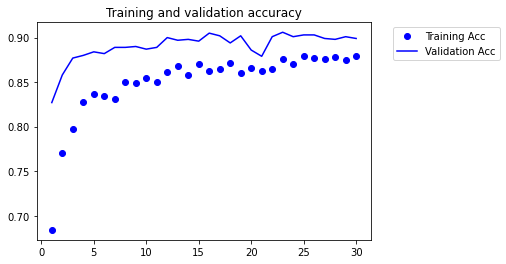

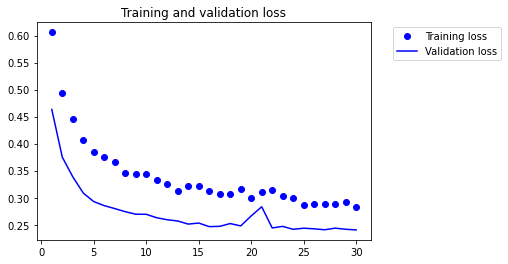

In [97]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label="Training Acc")
plt.plot(epochs, val_acc, 'b', label="Validation Acc")
plt.title("Training and validation accuracy")
# plt.ylim([0.8, 1])
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.figure()
plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Training and validation loss")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# plt.ylim([0, 0.5])
plt.show()

In [53]:
with strategy.scope():
  
  conv_base = VGG16(weights='imagenet',
                    include_top=False,
                    input_shape=(150, 150, 3))

  model = models.Sequential()
  model.add(conv_base)
  model.add(layers.Flatten())
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))

  '''禁止在conv_base時修正weights'''
  print('This is the number of trainable weights'
        'before freezing the conv base:', len(model.trainable_weights))
  conv_base.trainable = True  #####先設定所有曾為可訓練
  print('This is the number of trainable weights'
        'after none freezing the conv base:', len(model.trainable_weights))
  set_trainable = False
  for layer in conv_base.layers:
    if layer.name == 'block_con1':    ## block_con1以後的層才可以訓練
      set_trainable = True
    if set_trainable :
      layer.trainable = True
    else:
      layer.trainable = False

  train_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest'
  )
  test_datagen = ImageDataGenerator(rescale=1./255)

  train_generator = train_datagen.flow_from_directory(
                      train_dir,
                      target_size=(150, 150),
                      batch_size=20,
                      class_mode='binary'
  )

  validation_generator = test_datagen.flow_from_directory(
                          validation_dir,
                          target_size=(150,150),
                          batch_size=20,
                          class_mode='binary'
  )

  model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(learning_rate=1e-5),    ##此時要用很低的learning rate，限制CGG16最後三層的表示法修改幅度
                metrics=['acc'])

  history = model.fit(
                      train_generator,
                      steps_per_epoch=100,
                      epochs=100,
                      validation_data=validation_generator,
                      validation_steps=50
)

This is the number of trainable weightsbefore freezing the conv base: 30
This is the number of trainable weightsafter none freezing the conv base: 30
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
Epoch 1/100
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/tas

In [ ]:
model.summary()

Error: Session cannot generate requests

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label="Training Acc")
plt.plot(epochs, val_acc, 'b', label="Validation Acc")
plt.title("Training and validation accuracy")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.figure()
plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Training and validation loss")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [ ]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1  - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training ACC')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation ACC')
plt.title('Training and validation ACC')
plt.legend()

plt.figure()
plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training Loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.show()

In [ ]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150,150),
                                                  batch_size=20,
                                                  class_mode='binary')

# test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

In [32]:
path = 'D:/Code_practice/project/dog_cat/'
from keras.models import load_model
model_create = load_model(f'{path}cats_and_dogs_small_2.h5')
model_create.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 128)      

(1, 150, 150, 3)


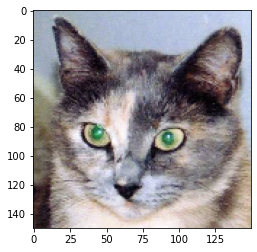

In [16]:
img_path = (f'{path}/data/test/cats/cat.1700.jpg')
from keras.preprocessing import image
import numpy as np
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)   ###(1, 150, 150, 3)
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [33]:
from keras import models, Model

In [34]:
model_create.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 128)      

In [35]:
print(len(model.layers))
print(model_create.inputs)
print(model_create.summary())

12
[<KerasTensor: shape=(None, 150, 150, 3) dtype=float32 (created by layer 'conv2d_16_input')>]
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 128)       0         
_______________________

In [42]:
model_create.layers

In [43]:
model_create.input

<KerasTensor: shape=(None, 150, 150, 3) dtype=float32 (created by layer 'conv2d_16_input')>

In [38]:
layer_outputs = [layer.output for layer in model_create.layers[:8]]
for op in layer_outputs: 
    print(op)

activation_model = Model(inputs=model_create.input, outputs=layer_outputs)


KerasTensor(type_spec=TensorSpec(shape=(None, 148, 148, 32), dtype=tf.float32, name=None), name='conv2d_16/Relu:0', description="created by layer 'conv2d_16'")
KerasTensor(type_spec=TensorSpec(shape=(None, 74, 74, 32), dtype=tf.float32, name=None), name='max_pooling2d_16/MaxPool:0', description="created by layer 'max_pooling2d_16'")
KerasTensor(type_spec=TensorSpec(shape=(None, 72, 72, 64), dtype=tf.float32, name=None), name='conv2d_17/Relu:0', description="created by layer 'conv2d_17'")
KerasTensor(type_spec=TensorSpec(shape=(None, 36, 36, 64), dtype=tf.float32, name=None), name='max_pooling2d_17/MaxPool:0', description="created by layer 'max_pooling2d_17'")
KerasTensor(type_spec=TensorSpec(shape=(None, 34, 34, 128), dtype=tf.float32, name=None), name='conv2d_18/Relu:0', description="created by layer 'conv2d_18'")
KerasTensor(type_spec=TensorSpec(shape=(None, 17, 17, 128), dtype=tf.float32, name=None), name='max_pooling2d_18/MaxPool:0', description="created by layer 'max_pooling2d_18'

In [44]:
activations = activation_model.predict(img_tensor)
print(len(activations))
first_layer_activation = activations[0]
print(first_layer_activation.shape)

8
(1, 148, 148, 32)


In [ ]:
### Plot layers 響應圖
import matplotlib.pyplot as plt

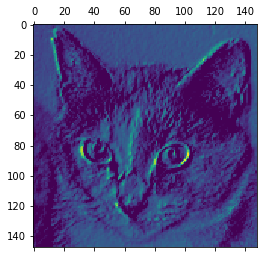

In [51]:
plt.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')

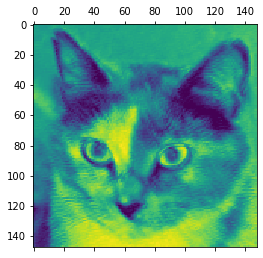

In [45]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

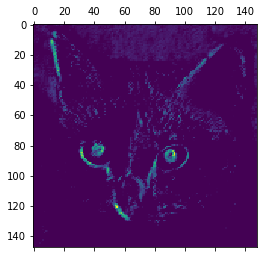

In [47]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap="viridis")

In [ ]:
## Visualization evey channel

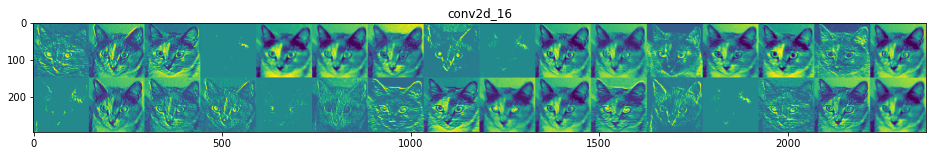

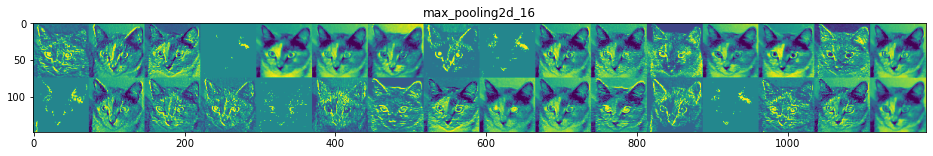

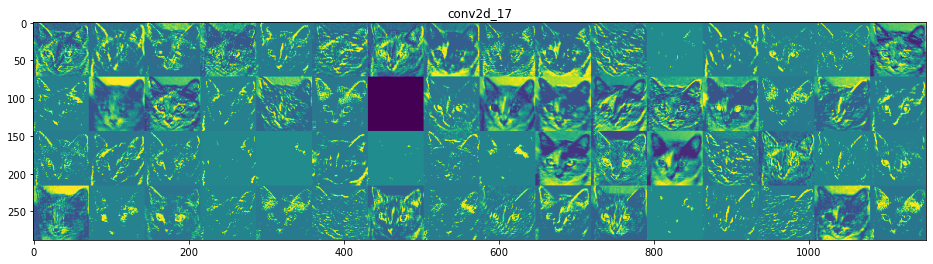

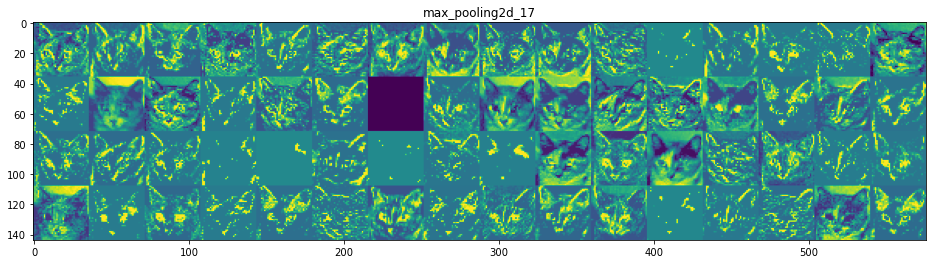

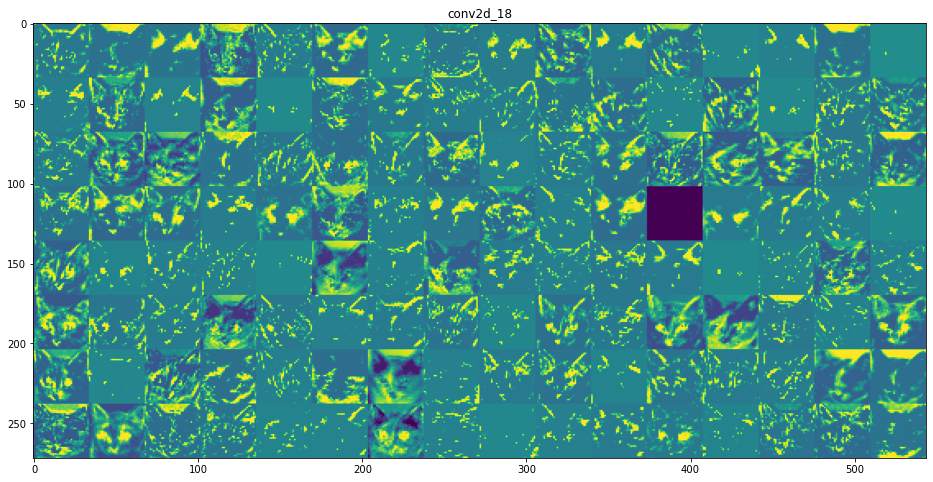

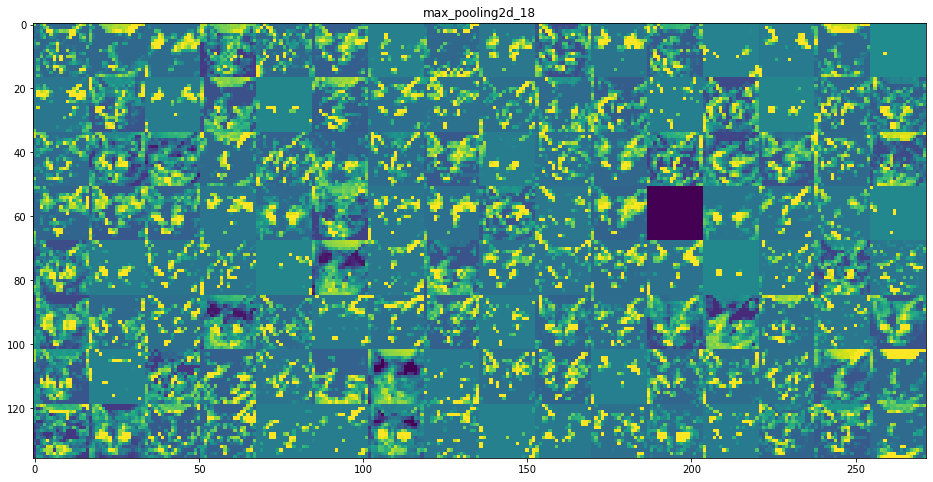

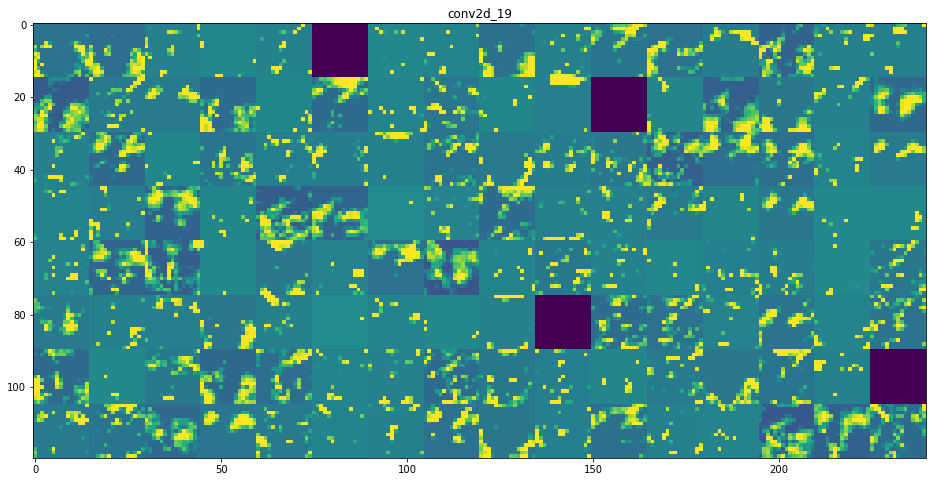

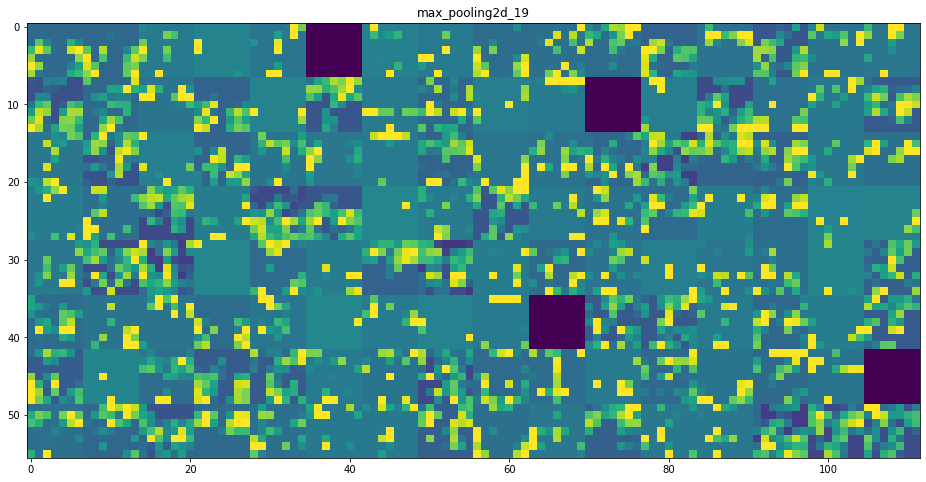

In [64]:
layer_names = []

# 取得各層的名字，這樣才可以成為圖表的一部分
for layer in model.layers[:8]:
  layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
  n_features = layer_activation.shape[-1]
  size = layer_activation.shape[1]

  n_cols = n_features // images_per_row
  display_grid = np.zeros((size * n_cols, images_per_row * size))

  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[0, :, :, col * images_per_row + row]
      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      display_grid[col * size : (col + 1) * size,
                    row * size : (row + 1) * size] = channel_image
      
  scale = 1./size
  plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
### 5-4-2 Visualization convnet filter

In [89]:
from keras.applications.vgg16 import VGG16
from keras import backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
### https://stackoverflow.com/questions/66221788/tf-gradients-is-not-supported-when-eager-execution-is-enabled-use-tf-gradientta

In [91]:
model = VGG16(weights='imagenet', include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

grads = K.gradients(loss, model.input)[0]
grads /= (K.sqrt(K.mean(K.mean(K.square(grads)))) + 1e-5)

In [95]:
iterate = K.function([model.input], [loss, grads])

import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [96]:
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.

step = 1.
for i in range(40):
  loss_value, drad_value = iterate([input_img_data])
  input_img_data += grads_value * step